In [28]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # does not affect other users

In [29]:
def load_LKS01_2019_2022(fpath:str):
    df = pd.read_excel(fpath,skiprows=3,thousands='.',decimal=',')
    df = df.rename(columns={
        'erfasste Fälle davon:\nVersuche':'erfasste Fälle: Anzahl Versuche',
        'von Spalte 3\nVersuche':'erfasste Fälle: Anzahl Versuche', # 2019
        'Unnamed: 6':'erfasste Fälle: Versuche in 5%',
        'Tatortverteilung':'Tatortverteilung: bis unter 20.000 Einwohner',
        'Unnamed: 8':'Tatortverteilung: 20.000 bis unter 100.000',
        'Unnamed: 9':'Tatortverteilung: 100.000 bis unter 500.000',
        'Unnamed: 10': 'Tatortverteilung: 500.000 und mehr',
        'Unnamed: 11':'Tatortverteilung: unbekannt',
        'mit Schusswaffe':'mit Schusswaffe: gedroht',
        'Unnamed: 13':'mit Schusswaffe: geschossen',
        'Aufklärung':'Aufklärung: Anzahl Fälle',
        'Unnamed: 15':'Aufklärung: in % (AQ)',
        'Tatverdächtige':'Tatverdächtige: insgesamt',
        'Unnamed: 17':'Tatverdächtige: männlich',
        'von Spalte 16':'Tatverdächtige: männlich',
        'Unnamed: 18':'Tatverdächtige: weiblich',
        'Nichtdeutsche Tatverdächtige':'Nichtdeutsche Tatverdächtige: Anzahl',
        'Unnamed: 19':'Nichtdeutsche Tatverdächtige: Anzahl', # 2019
        'Unnamed: 20':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'
    })
    return df.drop(range(4)).reset_index(drop=True)

def load_LKS01_2015_2018(fpath):
    # confirmed for 2018,2017,2016,2015
    df = pd.read_excel(fpath,skiprows=4,thousands='.',decimal=',')
    df = df.drop(['BL-Schl.','Sort'], axis=1, errors='ignore')
    df = df.rename(columns={
        'von Spalte 4 Versuche':'erfasste Fälle: Anzahl Versuche',
        'Unnamed: 6':'erfasste Fälle: Versuche in %',
        'Unnamed: 7':'erfasste Fälle: Versuche in %', # 2018
        'Aufklärung':'Aufklärung: Anzahl Fälle',
        'Unnamed: 8':'Aufklärung: in % (AQ)', # really the same?
        'Unnamed: 9':'Aufklärung: in % (AQ)', # really the same?
        'Tatver-dächtige insg.':'Tatverdächtige: insgesamt',
        'Nichtdeutsche Tat-verdächtige':'Nichtdeutsche Tatverdächtige: Anzahl',
        'Unnamed: 11':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %',
        'Unnamed: 12':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %' # 2018
    })
    return df.drop(range(2)).reset_index(drop=True)

def load_LKS01_2014(fpath:str='Datasets/PKS/2014/tb01_FaelleGrundtabelleLaender_excel.xlsx'):
    df = pd.read_excel(fpath,skiprows=7,thousands='.',decimal=',')
    df = df.rename(columns={
        'Strft. Schl.':'Schlüssel',
        'erfasste Fälle 2014':'erfasste Fälle',
        'Versuche absolut':'erfasste Fälle: Anzahl Versuche',
        'Versuche in %':'erfasste Fälle: Versuche in %',
        'aufgeklärte Fälle':'Aufklärung: Anzahl Fälle',
        'AQ \nin %':'Aufklärung: in % (AQ)',
        'TV insges.':'Tatverdächtige: insgesamt',
        'NDTV insges.':'Nichtdeutsche Tatverdächtige: Anzahl',
        'NDTV in %':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'
    })
    return df

def load_LKS01_2013(fpath:str='Datasets/PKS/2013/tb01_FaelleGrundtabelleLaender_excel.xls'):
    df = pd.read_excel(fpath,skiprows=8,thousands='.',decimal=',')
    df = df.rename(columns={
        'Strft. Schl.':'Schlüssel',
        'erfasste Fälle 2013':'erfasste Fälle',
        'Versuche absolut':'erfasste Fälle: Anzahl Versuche',
        'Versuche in %':'erfasste Fälle: Versuche in %',
        'aufgeklärte Fälle':'Aufklärung: Anzahl Fälle',
        'AQ \nin %':'Aufklärung: in % (AQ)',
        'TV insges.':'Tatverdächtige: insgesamt',
        'NDTV insges.':'Nichtdeutsche Tatverdächtige: Anzahl',
        'NDTV in %':'Nichtdeutsche Tatverdächtige: Anteil an TV insg. in %'
    })
    return df

class LKS01_loader(Dataset):
    def __init__(self,root_dir:str='Datasets/PKS/'):
        self.root_dir = root_dir

    def __len__(self):
        return len(os.listdir(self.root_dir))
    
    def __getitem__(self,year):
        ypath = os.path.join(self.root_dir,str(year))
        for file in os.listdir(ypath):
            fpath = os.path.join(ypath,file)
            # load table for all years
            if 2013 > year or year > 2022:
                raise IndexError(f'No data for requested year: {year}.\nNote: There is no official data before 2013 for this table.')
            if any(desi in file for desi in ['LA','Laender']):
                if 2019 <= year <= 2022:
                    return load_LKS01_2019_2022(fpath)
                if 2015 <= year <= 2018:
                    return load_LKS01_2015_2018(fpath)
                if year == 2014:
                    return load_LKS01_2014(fpath)
                if year == 2013:
                    return load_LKS01_2013(fpath)

# Cooler Blog zu Mapping
Folgendes ist aus dem Artikel:
https://juanitorduz.github.io/germany_plots/

Sein Skript geht noch weiter, allerdings ist das für uns nicht relevant. Falls in den späteren Zellen was nicht funktioniert wie erwartet: Alle Zellen ab hier nochmal laufen lassen. Viele Operationen sind mehr oder weniger offensichtlich inplace.

In [30]:
# Make sure you read postal codes as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 
plz_shape_df = gpd.read_file('Datasets/PLZ/plz-5stellig/plz-5stellig.shp', dtype={'plz': str}) # ,encoding='Windows-1252')
plz_shape_df.drop(['einwohner','qkm'],axis=1,inplace=True)
plz_shape_df.head()

plz                                               note  \
0  64743  Situation unklar, evtl. haben die HÃ¤user Marb...   
1  81248                                     81248 MÃ¼nchen   
2  60315                     60315 Frankfurt am Main (FOUR)   
3  99331                                      99331 Geratal   
4  60312                 60312 Frankfurt am Main (Omniturm)   

                                            geometry  
0  POLYGON ((8.98124 49.60761, 8.98312 49.60748, ...  
1  POLYGON ((11.40526 48.16042, 11.40655 48.15678...  
2  POLYGON ((8.67254 50.11264, 8.67320 50.11266, ...  
3  POLYGON ((10.84048 50.74605, 10.84008 50.74421...  
4  POLYGON ((8.67262 50.11164, 8.67311 50.11182, ...

[Text(0.5, 1.0, 'Germany'), None, None]

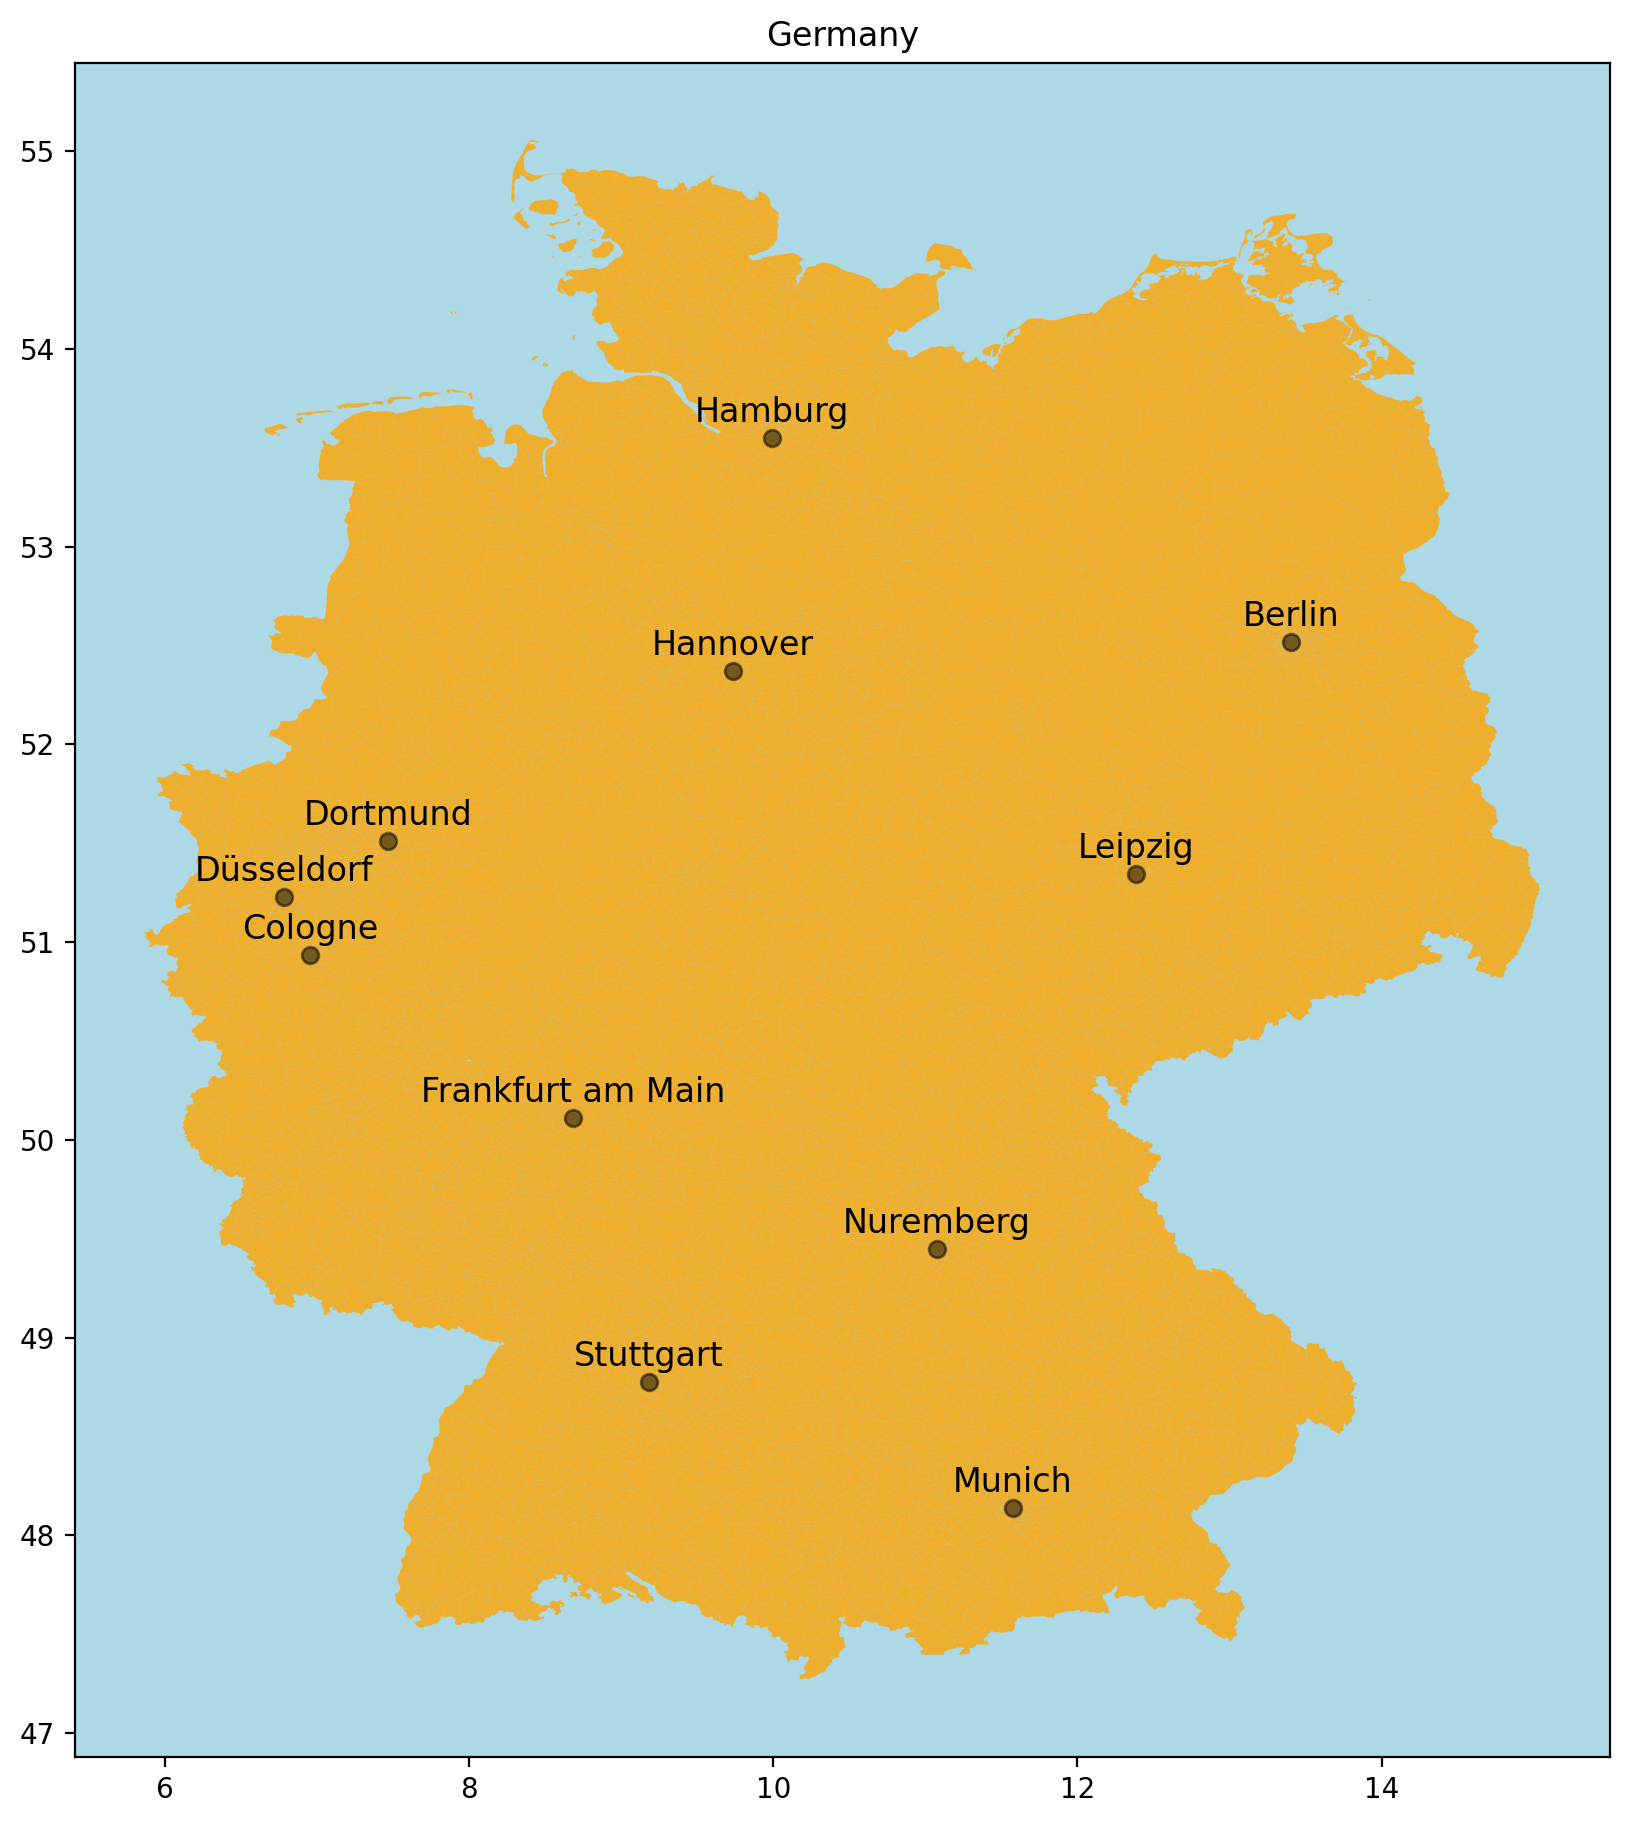

In [31]:
plt.rcParams['figure.figsize'] = [16, 11]

# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)

# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
)

[Text(0.5, 1.0, 'Germany First-Digit-Postal Codes Areas'), None, None]

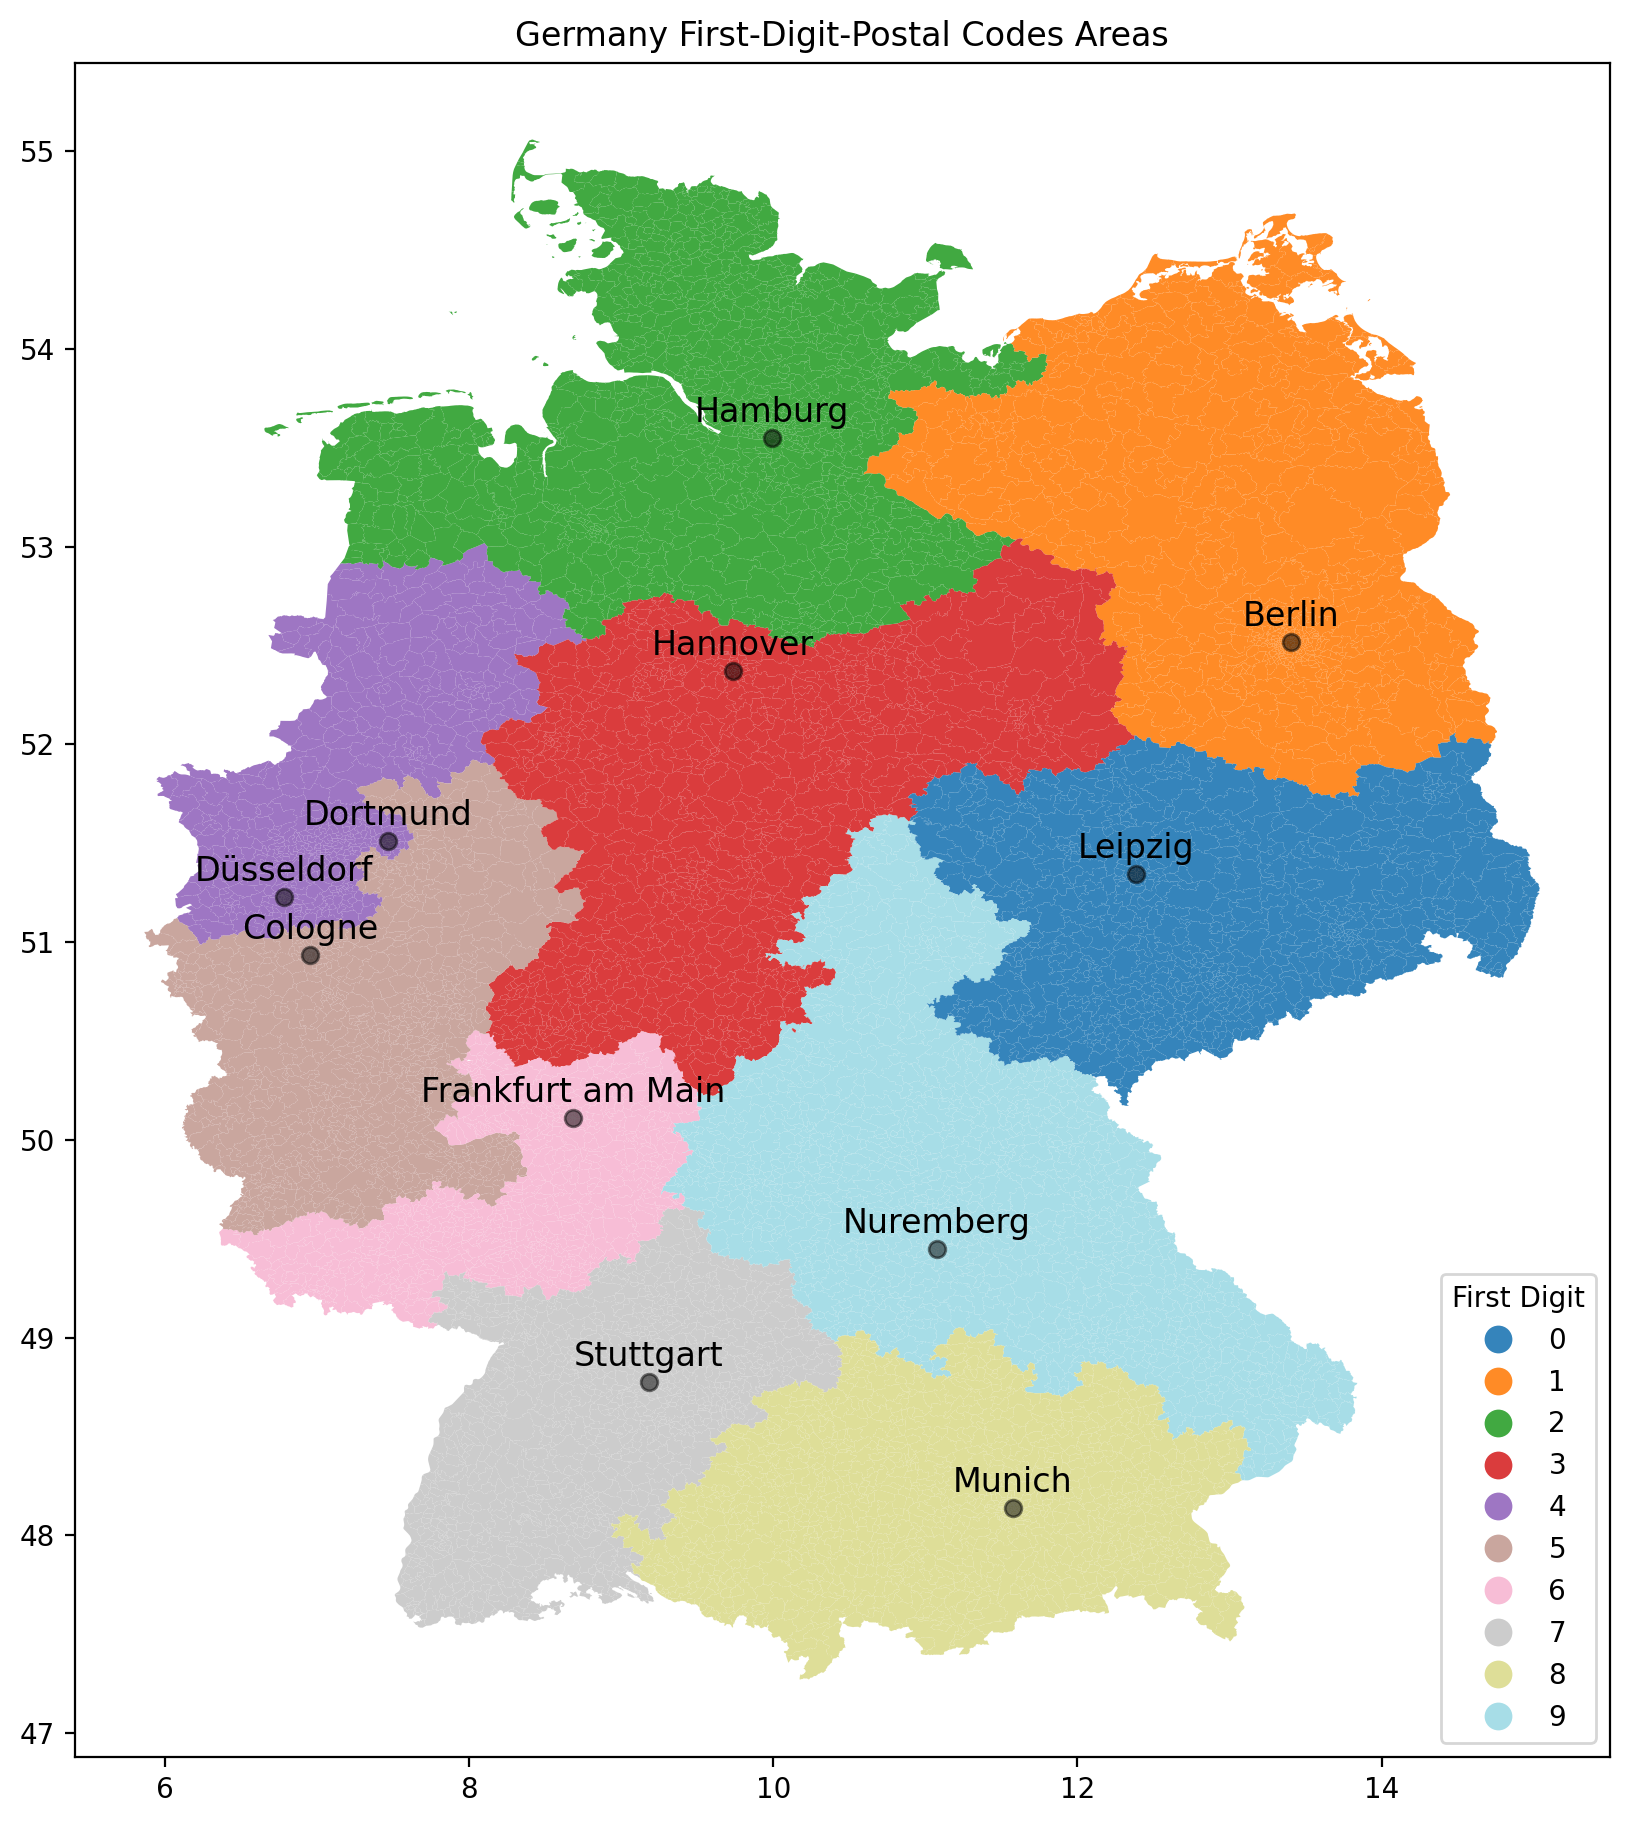

In [32]:
# Create feature.
plz_shape_df = plz_shape_df.assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))

fig, ax = plt.subplots()

plz_shape_df.plot(
    ax=ax, 
    column='first_dig_plz', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'First Digit', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany First-Digit-Postal Codes Areas', 
    aspect=1.3,
    facecolor='white'
)

In [33]:
plz_region_df = pd.read_csv(
    'Datasets/PLZ/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop(['osm_id','ags','landkreis'], axis=1, inplace=True)

plz_region_df.head()

ort    plz           bundesland
0    Aach  78267    Baden-Württemberg
1    Aach  54298      Rheinland-Pfalz
2  Aachen  52062  Nordrhein-Westfalen
3  Aachen  52064  Nordrhein-Westfalen
4  Aachen  52066  Nordrhein-Westfalen

In [49]:
# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

germany_df.head()

plz                                           geometry first_dig_plz  \
0  64743  POLYGON ((8.98124 49.60761, 8.98312 49.60748, ...             6   
1  81248  POLYGON ((11.40526 48.16042, 11.40655 48.15678...             8   
2  60315  POLYGON ((8.67254 50.11264, 8.67320 50.11266, ...             6   
3  99331  POLYGON ((10.84048 50.74605, 10.84008 50.74421...             9   
4  60312  POLYGON ((8.67262 50.11164, 8.67311 50.11182, ...             6   

                 ort bundesland  
0             Erbach     Hessen  
1            München     Bayern  
2  Frankfurt am Main     Hessen  
3            Geratal  Thüringen  
4  Frankfurt am Main     Hessen

[Text(0.5, 1.0, 'Germany - Bundesländer'), None, None]

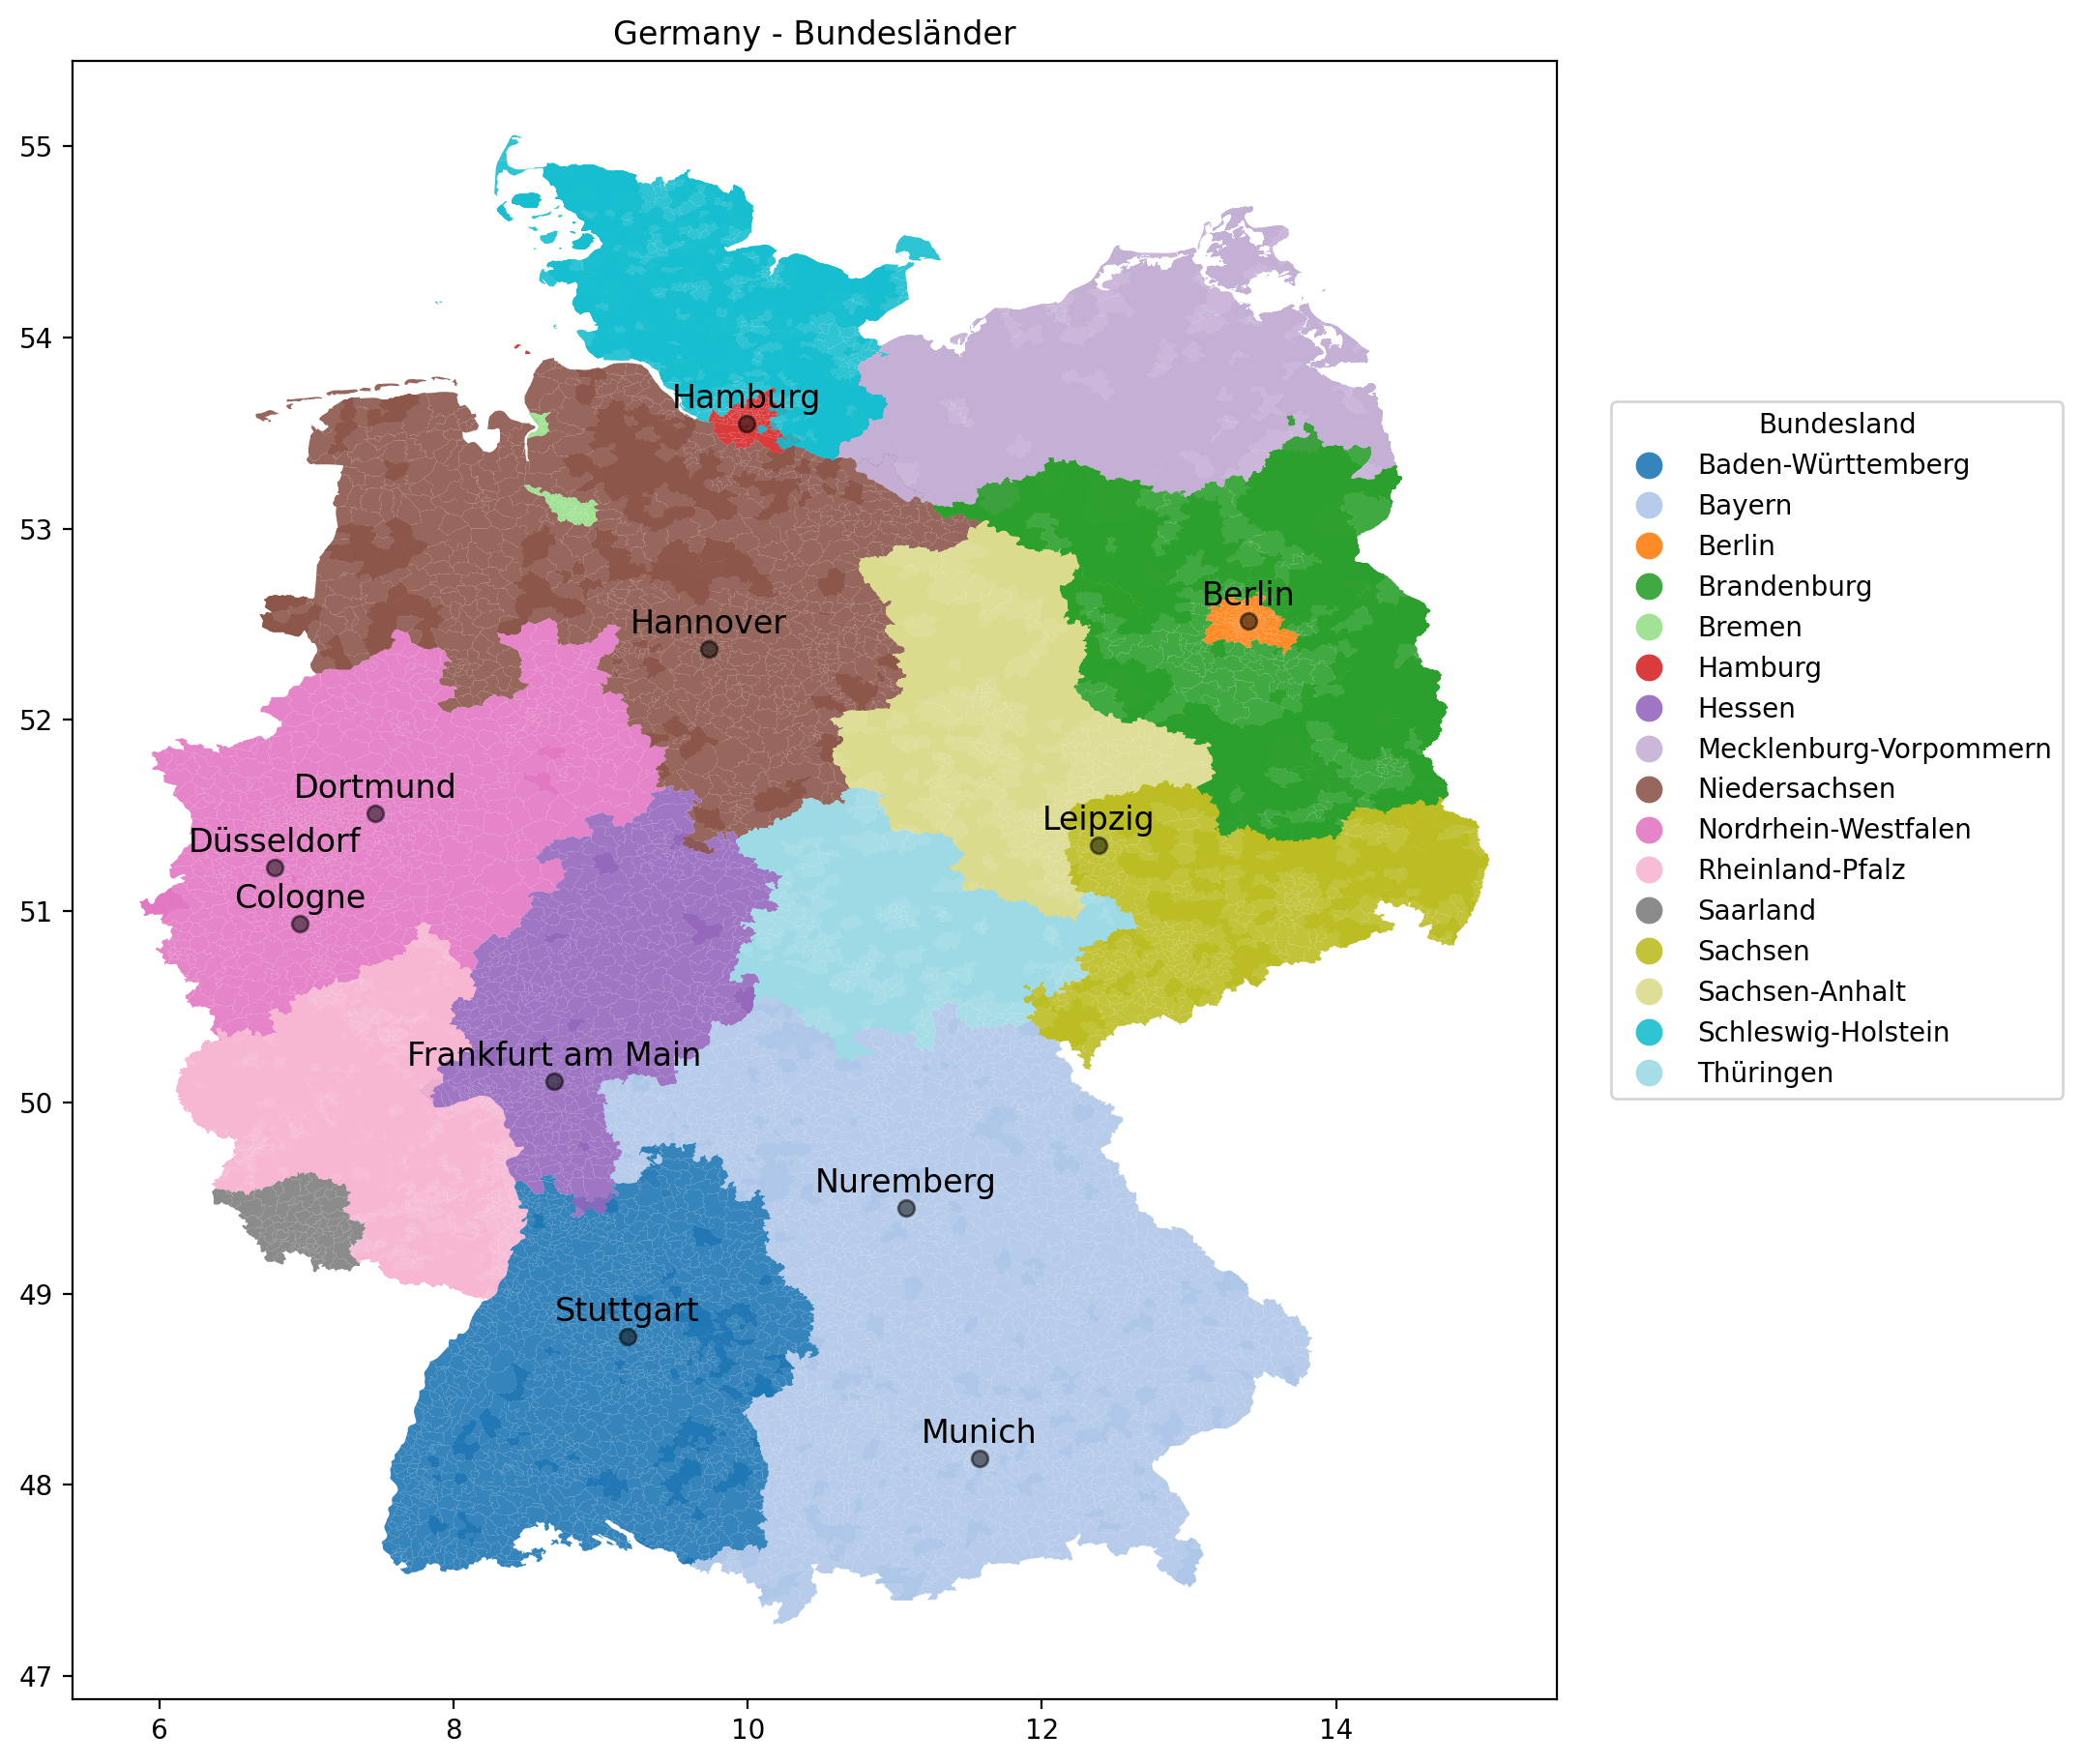

In [50]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='bundesland', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Bundesland', 'bbox_to_anchor': (1.35, 0.8)},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany - Bundesländer', 
    aspect=1.3, 
    facecolor='white'
)

In [51]:
plz_einwohner_df = pd.read_csv(
    'Datasets/PLZ/plz_einwohner.csv', 
    sep=',', 
    dtype={'plz': str, 'einwohner': int}
)
plz_einwohner_df.drop(['note','qkm','lat','lon'],axis=1,inplace=True)
plz_einwohner_df.head()

plz  einwohner
0  01067      11957
1  01069      25483
2  01097      14821
3  01099      28018
4  01108       5876

In [52]:
# Merge data.
germany_df = pd.merge(
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left'
)

germany_df.head()

plz                                           geometry first_dig_plz  \
0  64743  POLYGON ((8.98124 49.60761, 8.98312 49.60748, ...             6   
1  81248  POLYGON ((11.40526 48.16042, 11.40655 48.15678...             8   
2  60315  POLYGON ((8.67254 50.11264, 8.67320 50.11266, ...             6   
3  99331  POLYGON ((10.84048 50.74605, 10.84008 50.74421...             9   
4  60312  POLYGON ((8.67262 50.11164, 8.67311 50.11182, ...             6   

                 ort bundesland  einwohner  
0             Erbach     Hessen          3  
1            München     Bayern        121  
2  Frankfurt am Main     Hessen          0  
3            Geratal  Thüringen       4523  
4  Frankfurt am Main     Hessen          0

[Text(0.5, 1.0, 'Germany: Number of Inhabitants per Postal Code'), None, None]

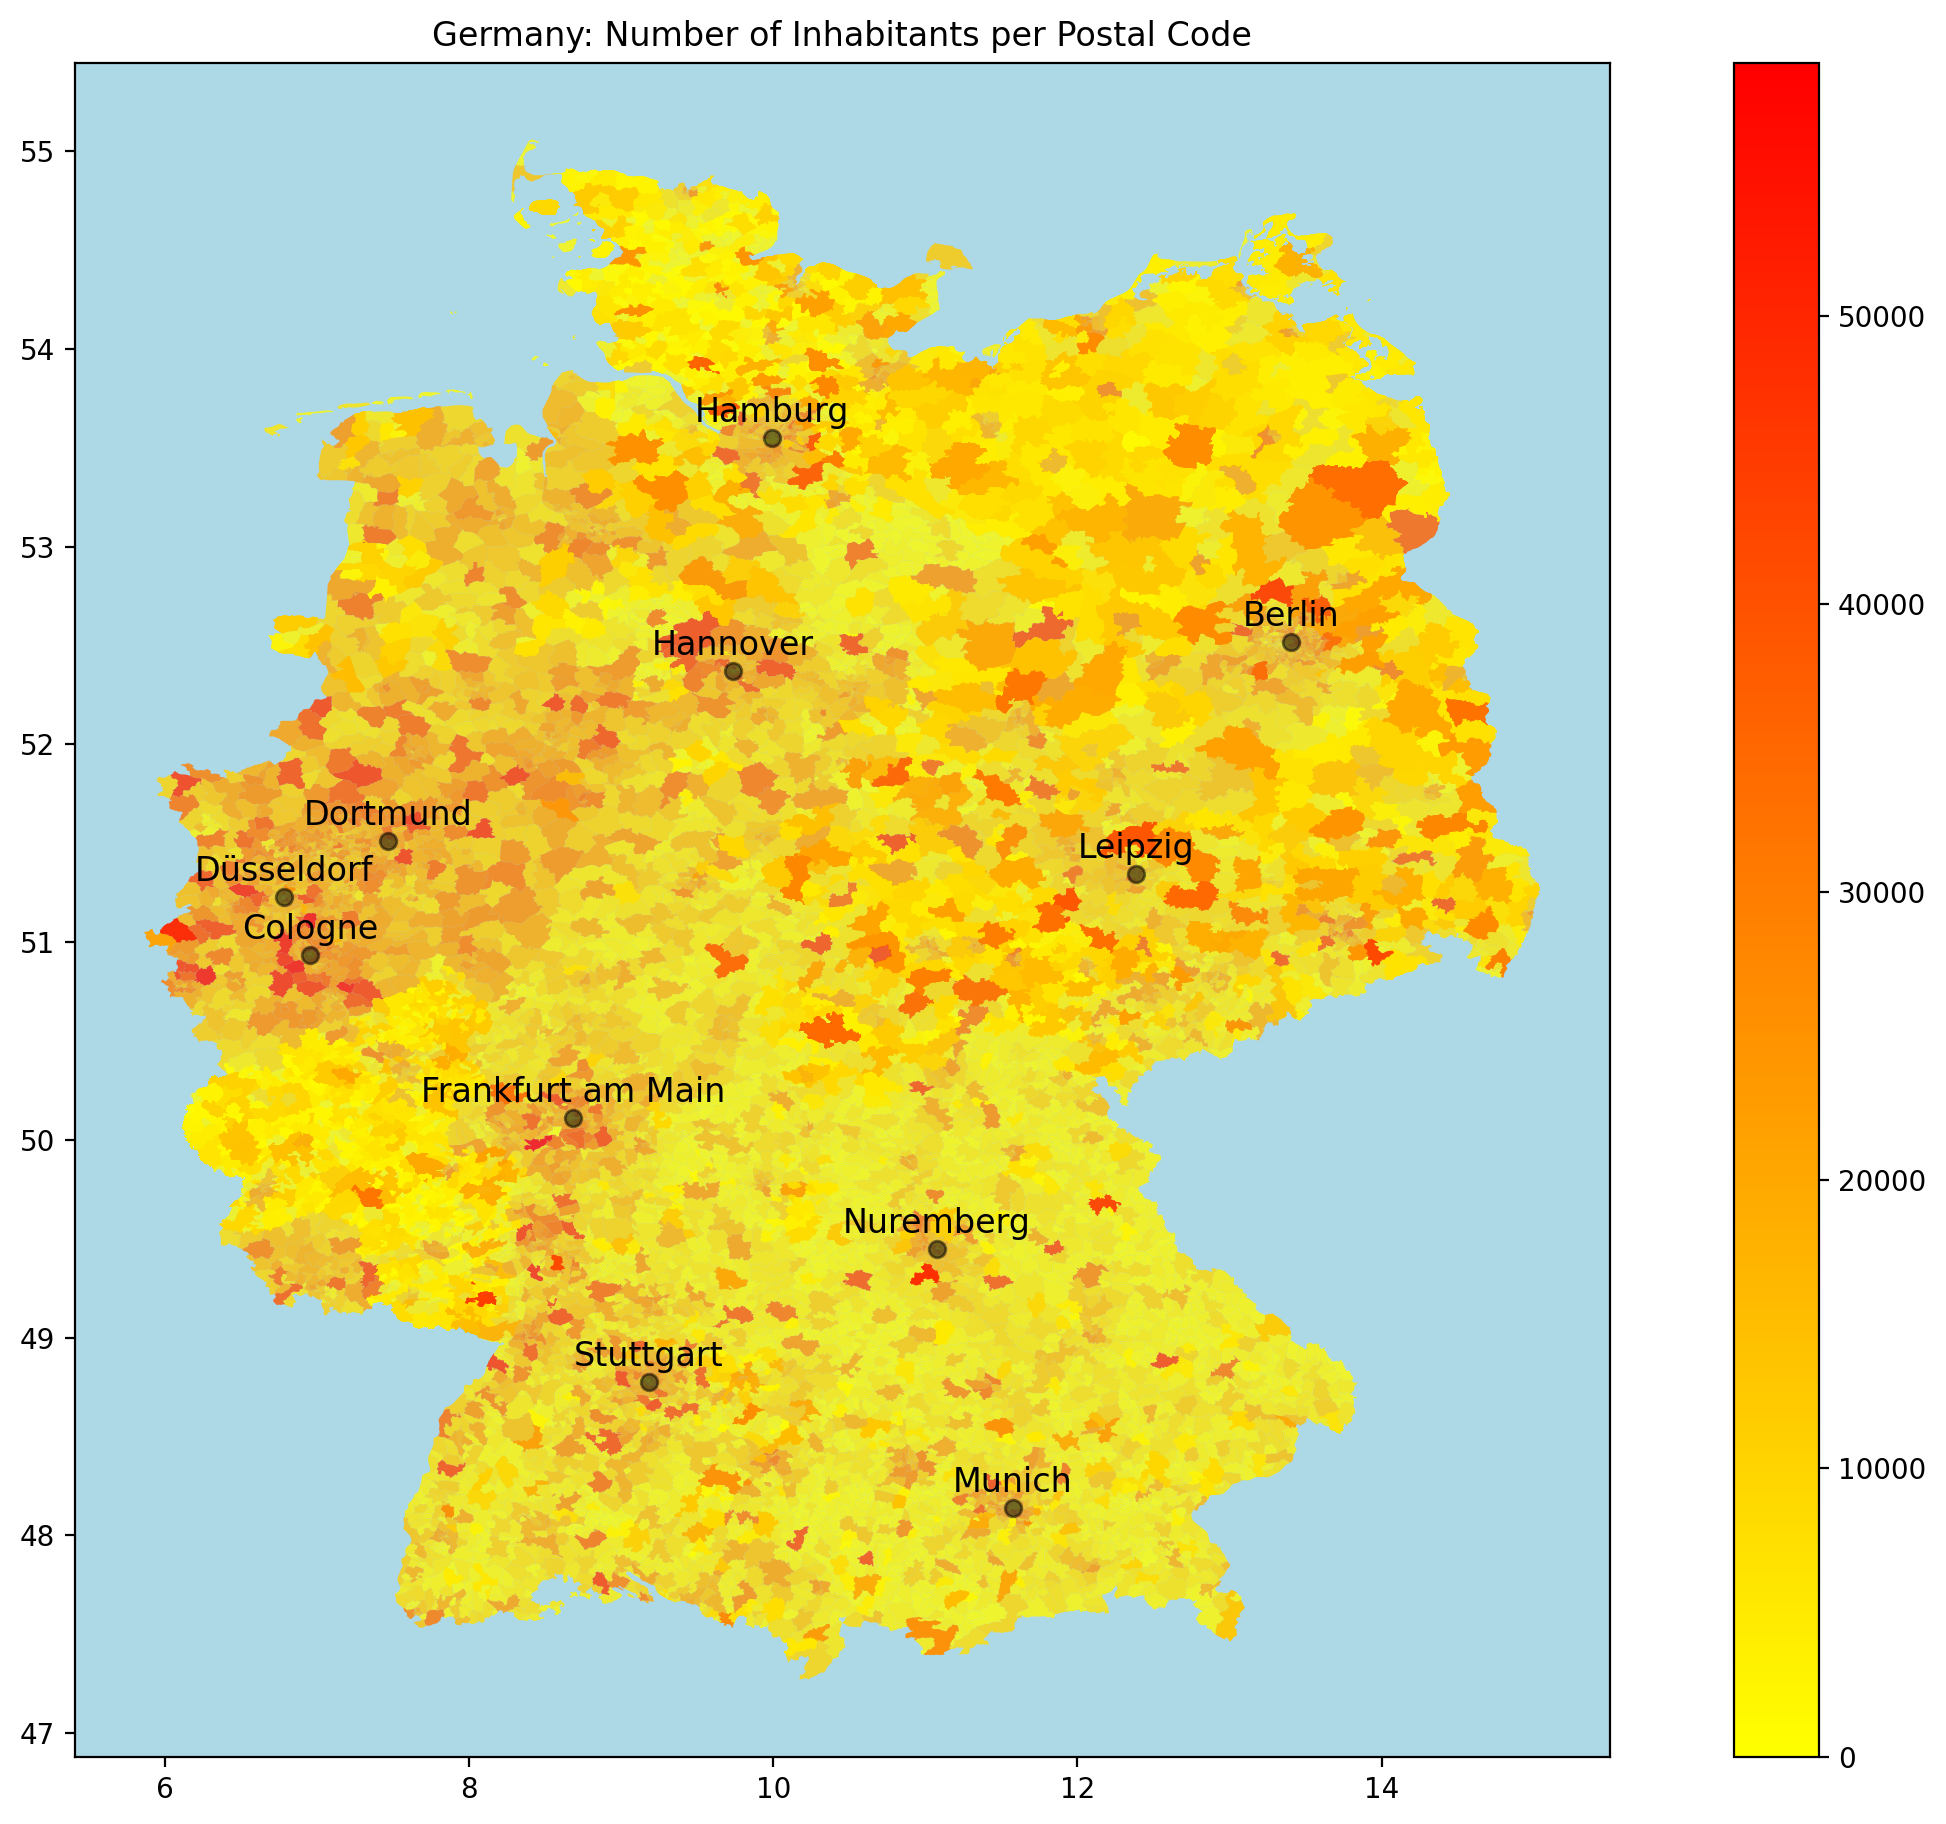

In [53]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
)

# Ab hier kommt wieder meine Code Ursuppe

In [ ]:
...